In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns
# 그냥 얘는 복/붙?

In [5]:
'''
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
'''

df = pd.read_csv('iris.data', names=['sl', 'sw', 'pl', 'pw', 'class'], index_col=False)
# df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# df.head()
# df.count()
# df.describe()

In [11]:
Y = LabelEncoder().fit_transform(df['class'])
Y = to_categorical(Y)
# print(Y)
X = df.drop('class', axis=1)
# X.head()

In [12]:
X_train = X[:-5]
X_test = X[-5:]
y_train = Y[:-5]
y_test = Y[-5:]

In [19]:
model  = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               1280      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 3)                 99        
                                                                 
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 1s 67ms/step - loss: 1.0818 - accuracy: 0.2923 - val_loss: 1.2635 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 [=======================

Text(0.5, 1.0, 'loss')

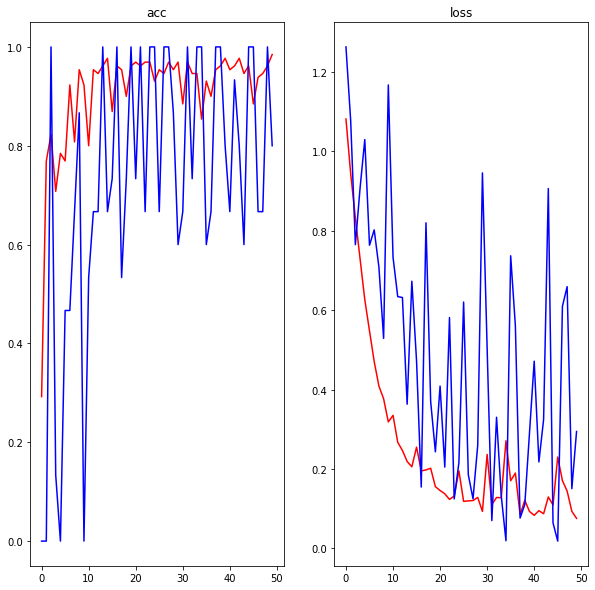

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('acc') # loss/validation과 이렇게 서로 교차하면 overfitting인가?
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

In [23]:
score = model.evaluate(X_test, y_test)
print(score)


1/1 [==============================] - 0s 23ms/step - loss: 0.1733 - accuracy: 1.0000
[0.17327742278575897, 1.0]


In [24]:
pred = model.predict(X_test)
print(pred)
print(y_test)

1/1 [==============================] - 0s 87ms/step
[[1.2209066e-04 1.4581779e-01 8.5406005e-01]
 [1.7146149e-04 1.4452952e-01 8.5529906e-01]
 [2.6241699e-04 2.6801309e-01 7.3172450e-01]
 [4.8811049e-05 4.4597793e-02 9.5535332e-01]
 [2.7697027e-04 1.7631552e-01 8.2340747e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
